### CONTEXT


GOT THE DATASET FROM KAGGLE: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

"The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING)."

__IMPLEMENTED SUPERVISED MACHINE LEARNING ALGORITHMS FOR CLASSIFICATION__

### IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import cross_val_score

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

C:\Users\tbresee\AppData\Roaming\Python\Python38\site-packages\mpl_toolkits\mplot3d\__init__.py:1: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from .axes3d import Axes3D


### READING THE DATA

In [2]:
df= pd.read_csv("test.csv")

In [3]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


### EXPLORATORY DATA ANALYSIS

In [4]:
df.shape

(2947, 563)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [6]:
df= df.drop_duplicates()
df.shape

(2947, 563)

__No duplicate rows were found.__

In [7]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

__The data has no missing values in the form of NaN.__

In [8]:
X= df.drop(columns=['Activity'])
X=X.values
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)
#561 Columns present in X are now represented by 3-Principal components present in reduced_X

**Since there are 561 predictors, we are using PCA to reduce the number of predictors which will help us in visualization.**

In [9]:
df2= pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3'])
df2['activity']=df['Activity']
df2.head()

,PC1,PC2,PC3,activity
0,10.534939,-4.121161,-1.494797,STANDING
1,10.328335,-5.752390,-1.366076,STANDING
2,10.206299,-6.406690,-0.719073,STANDING
3,10.195381,-6.526826,-1.004882,STANDING
4,10.210574,-6.422378,-1.697349,STANDING


### VIZUALIZING THE DISTRIBUTION OF THE COLUMNS

_Since PC1, PC2, PC3 is continuous in nature, we will use histogram to visualize it._

_For Activity, we will use bar chart because it is categorical in nature._

array([[<AxesSubplot:title={'center':'PC1'}>,
        <AxesSubplot:title={'center':'PC2'}>],
       [<AxesSubplot:title={'center':'PC3'}>, <AxesSubplot:>]],
      dtype=object)

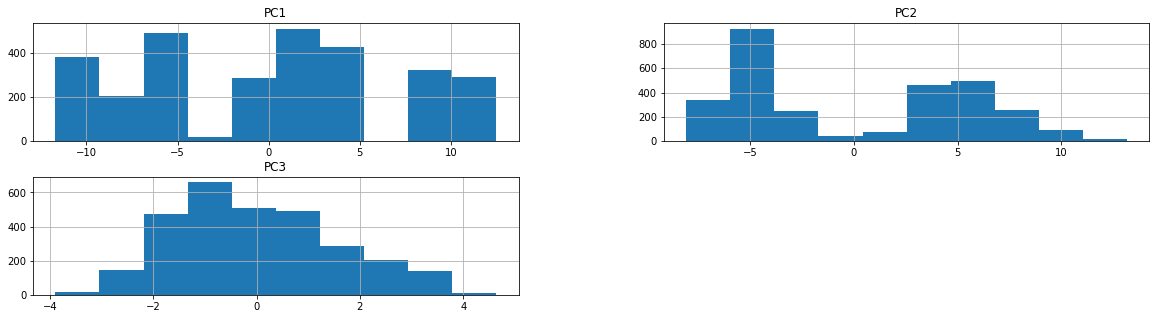

In [10]:
df2.hist(['PC1','PC2','PC3'],figsize=(20,5))

_None of them has extreme skewness and represent a fair distribution._

In [11]:
def bar_graph(data,predictor):
    grouped=data.groupby(predictor)
    chart=grouped.size().plot.bar(rot=0, title='Bar Chart showing the total frequency of different '+str(predictor), figsize=(15,4))
    chart.set_xlabel(predictor)

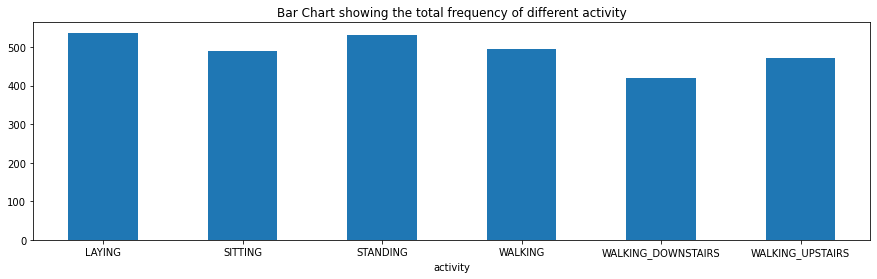

In [12]:
bar_graph(df2,'activity')

In [13]:
df2.activity.value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: activity, dtype: int64

__The distribution of the classes is fairly balanced.__
_____________________________________________________________________________________________________________________________

### VIZUALIZING THE RELATIONSHIP BETWEEN THE PREDICTORS AND THE TARGET VARIABLE 

_Using boxplot to see the relationship between categorical target variable and continuous predictors._

array([<AxesSubplot:title={'center':'PC1'}, xlabel='activity'>,
       <AxesSubplot:>], dtype=object)

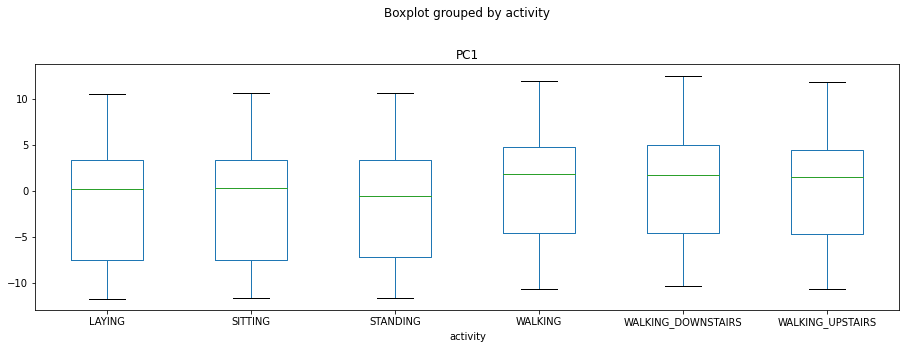

In [14]:
df2.boxplot(column=['PC1'], by='activity', figsize=(15,10),grid=False, layout=(2,1))

<AxesSubplot:title={'center':'PC2'}, xlabel='activity'>

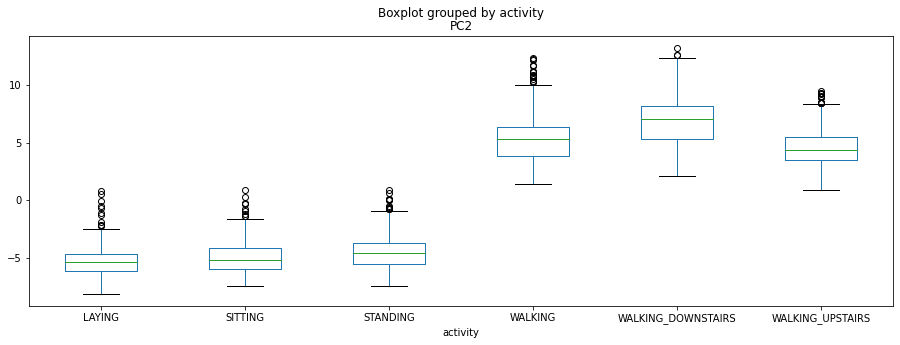

In [15]:
df2.boxplot(column=['PC2'], by='activity', figsize=(15,5),grid=False)

<AxesSubplot:title={'center':'PC3'}, xlabel='activity'>

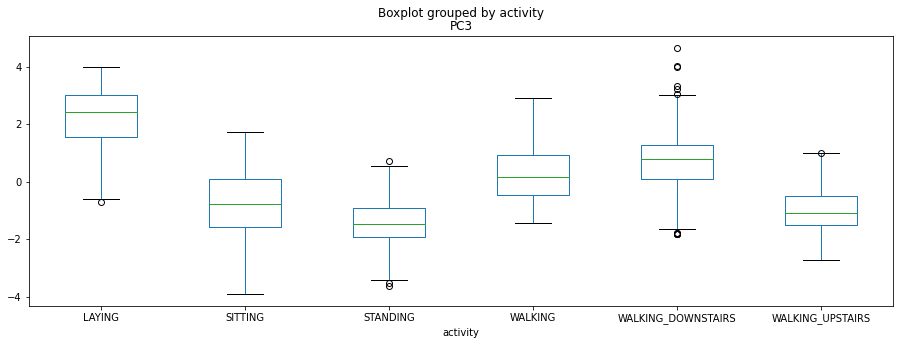

In [16]:
df2.boxplot(column=['PC3'], by='activity', figsize=(15,5),grid=False)

__The mean value of different activities is varying for all the 3 boxplots. This implies that the predictors are correlated with the target variable.__

### STATISTICAL TEST FOR CORRELATION

In [17]:
def anova_test(data,target,predictor):
    data1=data.groupby(target)[predictor].apply(list)
    from scipy.stats import f_oneway
    AnovaResults = f_oneway(*data1)
    if AnovaResults[1]<0.05:
        print(str(predictor)+' is related with the target variable : ', AnovaResults[1])
    else:
        print(str(predictor)+' is NOT related with the target variable : ', AnovaResults[1])

In [18]:
anova_test(df2,'activity','PC1')

PC1 is related with the target variable :  7.791600445953463e-12


In [19]:
anova_test(df2,'activity','PC2')

PC2 is related with the target variable :  0.0


In [20]:
anova_test(df2,'activity','PC3')

PC3 is related with the target variable :  0.0


__We used ANOVA test to check whether the predictors are correlated with the target variable.__

### TREATING THE CATEGORICAL VARIABLE

In [21]:
df2.activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [22]:
activity_mapping = {'STANDING': 1,
                'SITTING': 2,
                'LAYING': 3,
              'WALKING': 4,
               'WALKING_DOWNSTAIRS': 5,
               'WALKING_UPSTAIRS':6
              }
# encoding the Ordinal variable cut
df['Activity'] = df['Activity'].map(activity_mapping)

# Checking the encoded columns
df['Activity'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

__USING PCA WE SAW THAT THE PREDICTORS ARE RELATED TO THE TARGET VARIABLE. HOWEVER WE WILL NOT USE THE PCA COLUMNS FOR MODELLING PURPOSE BECAUSE IT CAN REDUCE THE ACCURACY.__

### SPLITTING THE DATASET INTO TRAINING AND TESTING

In [23]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,1
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,1
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,1
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,1
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,1


In [24]:
TargetVariable='Activity'
df2=df.drop(columns=['Activity','subject'])
predictor = df2.columns
x=df[predictor].values
y =df[TargetVariable].values

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2062, 561) (885, 561) (2062,) (885,)


### APPLYING DIFFERENT ALGORITHMS

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### MODEL

_LOGISTIC REGRESSION_

In [27]:
clf = LogisticRegression(C=1)

# Creating the model on Training Data
LOG=clf.fit(x_train,y_train)
prediction=LOG.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.95      0.96      0.95       137
           2       0.96      0.95      0.96       152
           3       1.00      1.00      1.00       170
           4       0.99      1.00      1.00       154
           5       1.00      0.98      0.99       123
           6       0.99      1.00      1.00       149

    accuracy                           0.98       885
   macro avg       0.98      0.98      0.98       885
weighted avg       0.98      0.98      0.98       885

[[131   6   0   0   0   0]
 [  7 145   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 154   0   0]
 [  0   0   0   1 121   1]
 [  0   0   0   0   0 149]]
Accuracy of the model: 0.98


C:\Users\tbresee\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_K-NEAREST CLASSIFIER_

In [28]:
clf = KNeighborsClassifier(n_neighbors=3)

# Creating the model on Training Data
KNN=clf.fit(x_train,y_train)
prediction=KNN.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           1       0.90      0.91      0.91       137
           2       0.92      0.91      0.92       152
           3       1.00      0.99      0.99       170
           4       0.96      0.99      0.97       154
           5       1.00      0.94      0.97       123
           6       0.99      1.00      0.99       149

    accuracy                           0.96       885
   macro avg       0.96      0.96      0.96       885
weighted avg       0.96      0.96      0.96       885

[[125  12   0   0   0   0]
 [ 12 139   0   0   0   1]
 [  2   0 168   0   0   0]
 [  0   0   0 153   0   1]
 [  0   0   0   7 116   0]
 [  0   0   0   0   0 149]]
Accuracy of the model: 0.96


_DECISION TREE CLASSIFIER_

              precision    recall  f1-score   support

           1       0.76      0.91      0.82       137
           2       0.90      0.74      0.81       152
           3       1.00      1.00      1.00       170
           4       0.68      0.95      0.79       154
           5       0.91      0.59      0.72       123
           6       0.82      0.71      0.76       149

    accuracy                           0.83       885
   macro avg       0.84      0.82      0.82       885
weighted avg       0.85      0.83      0.82       885

[[124  13   0   0   0   0]
 [ 40 112   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 147   2   5]
 [  0   0   0  31  73  19]
 [  0   0   0  38   5 106]]
Accuracy of the model: 0.82


<AxesSubplot:>

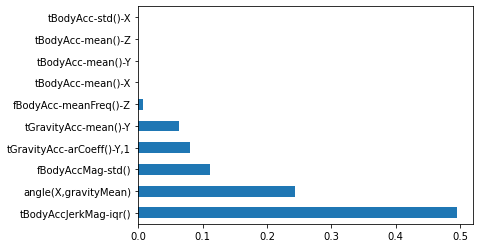

In [29]:
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Creating the model on Training Data
DTree=clf.fit(x_train,y_train)
prediction=DTree.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

_RANDOM FOREST CLASSIFIER_

              precision    recall  f1-score   support

           1       0.71      0.94      0.81       137
           2       0.93      0.65      0.76       152
           3       1.00      1.00      1.00       170
           4       0.89      0.97      0.93       154
           5       0.95      0.74      0.83       123
           6       0.87      0.95      0.91       149

    accuracy                           0.88       885
   macro avg       0.89      0.88      0.87       885
weighted avg       0.89      0.88      0.88       885

[[129   8   0   0   0   0]
 [ 53  99   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 149   2   3]
 [  0   0   0  14  91  18]
 [  0   0   0   4   3 142]]
Accuracy of the model: 0.88


<AxesSubplot:>

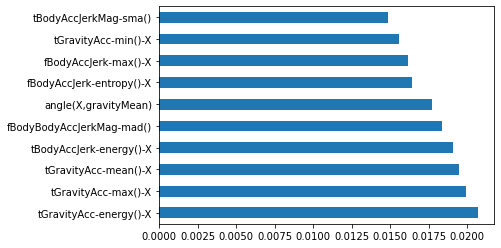

In [30]:
clf = RandomForestClassifier(max_depth=4, n_estimators=600,criterion='entropy')

# Creating the model on Training Data
RF=clf.fit(x_train,y_train)
prediction=RF.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

_SUPPORT VECTOR MACHINE_

In [31]:
clf = SVC(C=100, gamma=0.001, kernel='rbf')

# Creating the model on Training Data
SVM=clf.fit(x_train,y_train)
prediction=SVM.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.96      0.96      0.96       137
           2       0.97      0.97      0.97       152
           3       1.00      1.00      1.00       170
           4       0.99      1.00      1.00       154
           5       1.00      0.99      1.00       123
           6       1.00      1.00      1.00       149

    accuracy                           0.99       885
   macro avg       0.99      0.99      0.99       885
weighted avg       0.99      0.99      0.99       885

[[132   5   0   0   0   0]
 [  5 147   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 154   0   0]
 [  0   0   0   1 122   0]
 [  0   0   0   0   0 149]]
Accuracy of the model: 0.99


### SAMPLING TECHNIQUES: SMOTE, OVERSAMPLING, UNDERSAMPLING

In [32]:
from imblearn.over_sampling import SMOTE
smk=SMOTE(random_state=42)
x_smote,y_smote=smk.fit_resample(x_train,y_train)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({4: 395, 2: 395, 1: 395, 6: 395, 5: 395, 3: 395})


In [33]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state=42)
x_over,y_over= ros.fit_resample(x_train,y_train)
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({4: 395, 2: 395, 1: 395, 6: 395, 5: 395, 3: 395})


In [34]:
from imblearn.under_sampling import RandomUnderSampler
rus= RandomUnderSampler(random_state=42)
x_under,y_under= rus.fit_resample(x_train,y_train)
print('Resampled dataset shape %s' % Counter(y_under))

Resampled dataset shape Counter({1: 297, 2: 297, 3: 297, 4: 297, 5: 297, 6: 297})


_LOGISTIC REGRESSION AFTER SAMPLING_

In [35]:
clf = LogisticRegression(C=1)

# Creating the model on Training Data
LOG=clf.fit(x_smote,y_smote)
prediction=LOG.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.95      0.96      0.95       137
           2       0.96      0.95      0.96       152
           3       1.00      1.00      1.00       170
           4       0.99      1.00      1.00       154
           5       1.00      0.98      0.99       123
           6       0.99      1.00      1.00       149

    accuracy                           0.98       885
   macro avg       0.98      0.98      0.98       885
weighted avg       0.98      0.98      0.98       885

[[131   6   0   0   0   0]
 [  7 145   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 154   0   0]
 [  0   0   0   1 121   1]
 [  0   0   0   0   0 149]]
Accuracy of the model: 0.98


C:\Users\tbresee\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
clf = LogisticRegression(C=1)

# Creating the model on Training Data
LOG=clf.fit(x_over,y_over)
prediction=LOG.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.95      0.96      0.95       137
           2       0.96      0.95      0.96       152
           3       1.00      1.00      1.00       170
           4       0.99      1.00      1.00       154
           5       1.00      0.98      0.99       123
           6       0.99      1.00      1.00       149

    accuracy                           0.98       885
   macro avg       0.98      0.98      0.98       885
weighted avg       0.98      0.98      0.98       885

[[131   6   0   0   0   0]
 [  7 145   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 154   0   0]
 [  0   0   0   1 121   1]
 [  0   0   0   0   0 149]]
Accuracy of the model: 0.98


C:\Users\tbresee\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
clf = LogisticRegression(C=1)

# Creating the model on Training Data
LOG=clf.fit(x_under,y_under)
prediction=LOG.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

C:\Users\tbresee\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       0.95      0.95      0.95       137
           2       0.95      0.95      0.95       152
           3       1.00      1.00      1.00       170
           4       0.99      1.00      1.00       154
           5       1.00      0.98      0.99       123
           6       0.99      1.00      1.00       149

    accuracy                           0.98       885
   macro avg       0.98      0.98      0.98       885
weighted avg       0.98      0.98      0.98       885

[[130   7   0   0   0   0]
 [  7 145   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 154   0   0]
 [  0   0   0   1 121   1]
 [  0   0   0   0   0 149]]
Accuracy of the model: 0.98


_K NEAREST CLASSIFIERS AFTER SAMPLING_

In [38]:
clf = KNeighborsClassifier(n_neighbors=3)

# Creating the model on Training Data
KNN=clf.fit(x_smote,y_smote)
prediction=KNN.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.92      0.88      0.90       137
           2       0.89      0.94      0.92       152
           3       1.00      0.99      0.99       170
           4       0.96      0.99      0.98       154
           5       1.00      0.94      0.97       123
           6       0.99      1.00      0.99       149

    accuracy                           0.96       885
   macro avg       0.96      0.96      0.96       885
weighted avg       0.96      0.96      0.96       885

[[120  17   0   0   0   0]
 [  9 143   0   0   0   0]
 [  2   0 168   0   0   0]
 [  0   0   0 153   0   1]
 [  0   0   0   6 116   1]
 [  0   0   0   0   0 149]]
Accuracy of the model: 0.96


In [39]:
clf = KNeighborsClassifier(n_neighbors=3)

# Creating the model on Training Data
KNN=clf.fit(x_over,y_over)
prediction=KNN.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           1       0.91      0.88      0.90       137
           2       0.90      0.93      0.91       152
           3       1.00      0.99      0.99       170
           4       0.96      0.99      0.98       154
           5       1.00      0.94      0.97       123
           6       0.98      1.00      0.99       149

    accuracy                           0.96       885
   macro avg       0.96      0.96      0.96       885
weighted avg       0.96      0.96      0.96       885

[[121  16   0   0   0   0]
 [ 10 141   0   0   0   1]
 [  2   0 168   0   0   0]
 [  0   0   0 153   0   1]
 [  0   0   0   6 116   1]
 [  0   0   0   0   0 149]]
Accuracy of the model: 0.96


In [40]:
clf = KNeighborsClassifier(n_neighbors=3)

# Creating the model on Training Data
KNN=clf.fit(x_under,y_under)
prediction=KNN.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           1       0.91      0.91      0.91       137
           2       0.92      0.92      0.92       152
           3       1.00      0.99      0.99       170
           4       0.96      0.99      0.98       154
           5       1.00      0.95      0.97       123
           6       0.99      1.00      0.99       149

    accuracy                           0.96       885
   macro avg       0.96      0.96      0.96       885
weighted avg       0.96      0.96      0.96       885

[[124  13   0   0   0   0]
 [ 11 140   0   0   0   1]
 [  2   0 168   0   0   0]
 [  0   0   0 153   0   1]
 [  0   0   0   6 117   0]
 [  0   0   0   0   0 149]]
Accuracy of the model: 0.96


_DECISION TREE AFTER SAMPLING_

              precision    recall  f1-score   support

           1       0.76      0.91      0.82       137
           2       0.90      0.74      0.81       152
           3       1.00      1.00      1.00       170
           4       0.74      0.88      0.80       154
           5       0.94      0.59      0.72       123
           6       0.76      0.83      0.79       149

    accuracy                           0.83       885
   macro avg       0.85      0.82      0.82       885
weighted avg       0.85      0.83      0.83       885

[[124  13   0   0   0   0]
 [ 40 112   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 136   2  16]
 [  0   0   0  27  72  24]
 [  0   0   0  22   3 124]]
Accuracy of the model: 0.83


<AxesSubplot:>

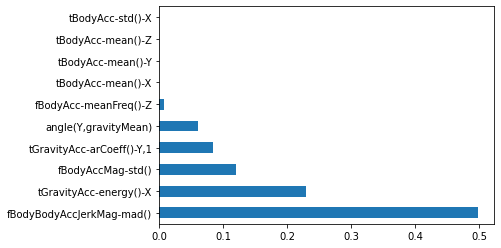

In [41]:
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Creating the model on Training Data
DTree=clf.fit(x_smote,y_smote)
prediction=DTree.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

              precision    recall  f1-score   support

           1       0.76      0.91      0.82       137
           2       0.90      0.74      0.81       152
           3       1.00      1.00      1.00       170
           4       0.71      0.96      0.82       154
           5       0.94      0.74      0.83       123
           6       0.84      0.68      0.75       149

    accuracy                           0.84       885
   macro avg       0.86      0.84      0.84       885
weighted avg       0.86      0.84      0.84       885

[[124  13   0   0   0   0]
 [ 40 112   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 148   1   5]
 [  0   0   0  18  91  14]
 [  0   0   0  43   5 101]]
Accuracy of the model: 0.84


<AxesSubplot:>

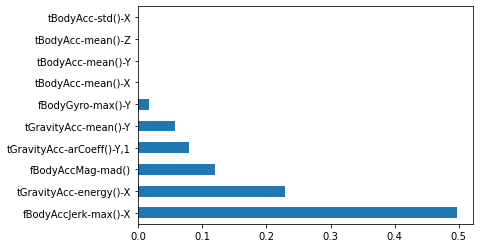

In [42]:
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Creating the model on Training Data
DTree=clf.fit(x_over,y_over)
prediction=DTree.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

              precision    recall  f1-score   support

           1       0.75      0.90      0.82       137
           2       0.90      0.74      0.81       152
           3       1.00      1.00      1.00       170
           4       0.74      0.88      0.80       154
           5       0.89      0.62      0.73       123
           6       0.76      0.81      0.78       149

    accuracy                           0.83       885
   macro avg       0.84      0.82      0.82       885
weighted avg       0.84      0.83      0.83       885

[[123  13   0   0   0   1]
 [ 40 112   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 136   2  16]
 [  0   0   0  26  76  21]
 [  0   0   0  22   7 120]]
Accuracy of the model: 0.83


<AxesSubplot:>

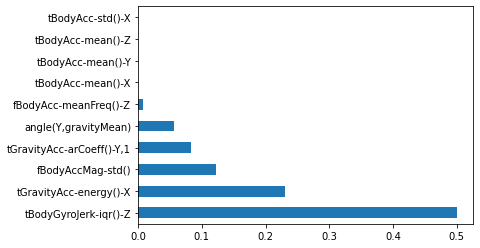

In [43]:
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Creating the model on Training Data
DTree=clf.fit(x_under,y_under)
prediction=DTree.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

_RANDOM FOREST CLASSIFIER AFTER SAMPLING_

              precision    recall  f1-score   support

           1       0.73      0.91      0.81       137
           2       0.90      0.70      0.79       152
           3       1.00      1.00      1.00       170
           4       0.92      0.96      0.94       154
           5       0.94      0.75      0.83       123
           6       0.86      0.96      0.91       149

    accuracy                           0.89       885
   macro avg       0.89      0.88      0.88       885
weighted avg       0.89      0.89      0.88       885

[[125  12   0   0   0   0]
 [ 46 106   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 148   3   3]
 [  0   0   0  10  92  21]
 [  0   0   0   3   3 143]]
Accuracy of the model: 0.88


<AxesSubplot:>

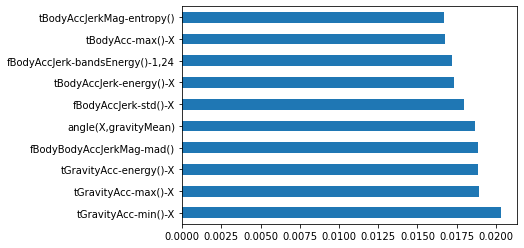

In [44]:
clf = RandomForestClassifier(max_depth=4, n_estimators=600,criterion='entropy')

# Creating the model on Training Data
RF=clf.fit(x_smote,y_smote)
prediction=RF.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

              precision    recall  f1-score   support

           1       0.71      0.91      0.80       137
           2       0.89      0.67      0.77       152
           3       1.00      1.00      1.00       170
           4       0.90      0.97      0.93       154
           5       0.94      0.75      0.83       123
           6       0.88      0.96      0.92       149

    accuracy                           0.88       885
   macro avg       0.89      0.88      0.88       885
weighted avg       0.89      0.88      0.88       885

[[125  12   0   0   0   0]
 [ 50 102   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 149   3   2]
 [  0   0   0  14  92  17]
 [  0   0   0   3   3 143]]
Accuracy of the model: 0.88


<AxesSubplot:>

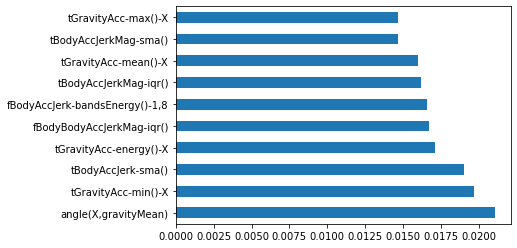

In [45]:
clf = RandomForestClassifier(max_depth=4, n_estimators=600,criterion='entropy')

# Creating the model on Training Data
RF=clf.fit(x_over,y_over)
prediction=RF.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

              precision    recall  f1-score   support

           1       0.77      0.92      0.84       137
           2       0.91      0.75      0.82       152
           3       1.00      1.00      1.00       170
           4       0.91      0.96      0.94       154
           5       0.94      0.75      0.83       123
           6       0.86      0.96      0.91       149

    accuracy                           0.90       885
   macro avg       0.90      0.89      0.89       885
weighted avg       0.90      0.90      0.89       885

[[126  11   0   0   0   0]
 [ 38 114   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 148   3   3]
 [  0   0   0  11  92  20]
 [  0   0   0   3   3 143]]
Accuracy of the model: 0.89


<AxesSubplot:>

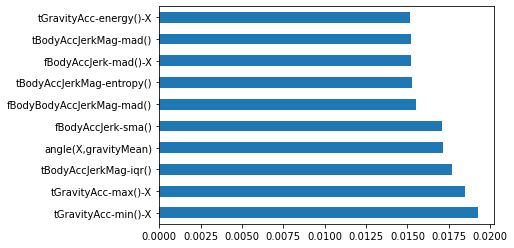

In [46]:
clf = RandomForestClassifier(max_depth=4, n_estimators=600,criterion='entropy')

# Creating the model on Training Data
RF=clf.fit(x_under,y_under)
prediction=RF.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

_SUPPORT VECTOR CLASSIFIER AFTER SAMPLING_

In [47]:
clf = SVC(C=100, gamma=0.001, kernel='rbf')

# Creating the model on Training Data
SVM_smote=clf.fit(x_smote,y_smote)
prediction=SVM_smote.predict(x_test)

# Measuring accuracy on Testing Datam
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.96      0.96      0.96       137
           2       0.97      0.97      0.97       152
           3       1.00      1.00      1.00       170
           4       0.99      1.00      1.00       154
           5       1.00      0.99      1.00       123
           6       1.00      1.00      1.00       149

    accuracy                           0.99       885
   macro avg       0.99      0.99      0.99       885
weighted avg       0.99      0.99      0.99       885

[[132   5   0   0   0   0]
 [  5 147   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 154   0   0]
 [  0   0   0   1 122   0]
 [  0   0   0   0   0 149]]
Accuracy of the model: 0.99


In [48]:
clf = SVC(C=100, gamma=0.001, kernel='rbf')

# Creating the model on Training Data
SVM_over=clf.fit(x_over,y_over)
prediction=SVM_over.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.96      0.96      0.96       137
           2       0.97      0.97      0.97       152
           3       1.00      1.00      1.00       170
           4       0.99      1.00      1.00       154
           5       1.00      0.99      1.00       123
           6       1.00      1.00      1.00       149

    accuracy                           0.99       885
   macro avg       0.99      0.99      0.99       885
weighted avg       0.99      0.99      0.99       885

[[132   5   0   0   0   0]
 [  5 147   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 154   0   0]
 [  0   0   0   1 122   0]
 [  0   0   0   0   0 149]]
Accuracy of the model: 0.99


In [49]:
clf = SVC(C=100, gamma=0.001, kernel='rbf')

# Creating the model on Training Data
SVM_under =clf.fit(x_under,y_under)
prediction=SVM_under.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.99      0.95      0.97       137
           2       0.96      0.99      0.97       152
           3       1.00      1.00      1.00       170
           4       0.99      1.00      1.00       154
           5       1.00      0.99      1.00       123
           6       1.00      1.00      1.00       149

    accuracy                           0.99       885
   macro avg       0.99      0.99      0.99       885
weighted avg       0.99      0.99      0.99       885

[[130   7   0   0   0   0]
 [  1 151   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0 154   0   0]
 [  0   0   0   1 122   0]
 [  0   0   0   0   0 149]]
Accuracy of the model: 0.99


__THE BEST MODEL IS SUPPORT VECTOR CLASSIFIER WITHOUT ANY SAMPLING TECHNIQUE.__

_Accuracy: 99%_

_Error proportion: 0.013_

### K-FOLD CROSS VALIDATION

In [50]:
accuracy_values= cross_val_score(SVM_under, x, y, cv=10, scoring='f1_weighted')
print(accuracy_values)
print('Final Average Accuracy of the Model:',accuracy_values.mean())

[0.97960607 0.96608252 0.88935917 0.89938518 0.98306729 0.92995826
 0.94742518 0.99659605 0.9207749  0.98979886]
Final Average Accuracy of the Model: 0.9502053482061378


### DEPLOYMENT OF THE MODEL

In [51]:
final_svm= SVM.fit(x,y)

In [52]:
test= pd.read_csv('test.csv')

In [53]:
test.drop(columns=['subject'],inplace=True)
test=test.drop_duplicates()

In [54]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [55]:
activity_mapping = {'STANDING': 1,
                'SITTING': 2,
                'LAYING': 3,
              'WALKING': 4,
               'WALKING_DOWNSTAIRS': 5,
               'WALKING_UPSTAIRS':6
              }
# encoding the Ordinal variable cut
test['Activity'] = test['Activity'].map(activity_mapping)

# Checking the encoded columns
test['Activity'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [56]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,1
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,1
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,1
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,1
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,1


In [57]:
TargetVariable='Activity'
test2= test.drop(columns=['Activity'])
predictor = test2.columns
x_test= test[predictor].values
y_test = test[TargetVariable].values

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x_test)

prediction= final_svm.predict(x)
test['Activity_Predictions']=prediction
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,Activity_Predictions
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,1,1
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,1,1
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,1,1
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,1,1
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,1,1


In [58]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       532
           2       1.00      1.00      1.00       491
           3       1.00      1.00      1.00       537
           4       1.00      1.00      1.00       496
           5       1.00      1.00      1.00       420
           6       1.00      1.00      1.00       471

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947

[[532   0   0   0   0   0]
 [  0 491   0   0   0   0]
 [  0   0 537   0   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   0 420   0]
 [  0   0   0   0   0 471]]
Accuracy of the model: 1.00


#### ACCURACY OF TRAIN SET : 99%

#### ACCURACY OF TEST SET : 100%

_MODEL: SUPPORT VECTOR CLASSIFIER AFTER UNDERSAMPLING (Because it has the highest accuracy and lowest error percentage)_

_STANDARDIZED the TRAIN SET_
